# Symmetric TSP Problem

In [1]:
distance = [[9999,26,40,34,35,48,30,23,48,17,20,29],
            [26,9999,64,61,59,78,54,47,50,29,28,33],
            [40,64,9999,3,5,8,10,15,24,30,33,39],
            [34,61,3,9999,3,10,8,13,26,28,30,35],
            [35,59,5,3,9999,13,5,10,29,25,28,33],
            [48,78,8,10,13,9999,18,23,16,38,39,33],
            [30,54,10,8,5,18,9999,5,34,20,23,28],
            [23,47,15,13,10,23,5,9999,38,15,18,23],
            [48,50,24,26,29,16,34,38,9999,23,21,16],
            [17,29,30,28,25,38,20,15,23,9999,3,8],
            [20,28,33,30,28,39,23,18,21,3,9999,5],
            [29,33,39,35,33,33,28,23,16,8,5,9999]]

In [2]:
import pandas as pd

In [3]:
pd.DataFrame(distance, index=[n for n in range(12)],columns= [n for n in range(12)])

,0,1,2,3,4,5,6,7,8,9,10,11
0,9999,26,40,34,35,48,30,23,48,17,20,29
1,26,9999,64,61,59,78,54,47,50,29,28,33
2,40,64,9999,3,5,8,10,15,24,30,33,39
3,34,61,3,9999,3,10,8,13,26,28,30,35
4,35,59,5,3,9999,13,5,10,29,25,28,33
5,48,78,8,10,13,9999,18,23,16,38,39,33
6,30,54,10,8,5,18,9999,5,34,20,23,28
7,23,47,15,13,10,23,5,9999,38,15,18,23
8,48,50,24,26,29,16,34,38,9999,23,21,16
9,17,29,30,28,25,38,20,15,23,9999,3,8


In [4]:
from pulp import *

In [5]:
prob = LpProblem("Traveling Saleman Problem", LpMinimize)

/Users/khuyentran/opt/anaconda3/lib/python3.7/site-packages/pulp/pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [6]:
#Set a list of arcs with nodes i, j
y  = LpVariable.dicts('arc',[(i,j) for i in range(12) for j in range(12)], cat = 'Binary')

#List of the sequence number of city j in a tour

u = LpVariable.dicts('city',[i for i in range(12)], cat = 'Integer', lowBound = 0, upBound = 12)

In [7]:
#Objective is to minimize the total distance
prob += lpSum(distance[i][j] * y[(i,j)] for i in range(12) for j in range(12))

In [8]:
V = set(range(12))

In [9]:
from itertools import product
#Define constraints
#Exactly 2 arcs are incident to one city 

for i in range(12):
    prob += lpSum(y[(i,j)] for j in V - {i}) == 1

for i in range(12):
    prob += lpSum(y[(j,i)] for j in V - {i}) == 1
    
for (i,j) in product(V-{11}, V-{11}):
        if i != j:
            prob += u[i]  - u[j] + 12*y[(i,j)] <= 11

In [10]:
prob.solve()

1

In [11]:
prob.writeLP('TSP.txt')

[arc_(0,_0),
 arc_(0,_1),
 arc_(0,_10),
 arc_(0,_11),
 arc_(0,_2),
 arc_(0,_3),
 arc_(0,_4),
 arc_(0,_5),
 arc_(0,_6),
 arc_(0,_7),
 arc_(0,_8),
 arc_(0,_9),
 arc_(1,_0),
 arc_(1,_1),
 arc_(1,_10),
 arc_(1,_11),
 arc_(1,_2),
 arc_(1,_3),
 arc_(1,_4),
 arc_(1,_5),
 arc_(1,_6),
 arc_(1,_7),
 arc_(1,_8),
 arc_(1,_9),
 arc_(10,_0),
 arc_(10,_1),
 arc_(10,_10),
 arc_(10,_11),
 arc_(10,_2),
 arc_(10,_3),
 arc_(10,_4),
 arc_(10,_5),
 arc_(10,_6),
 arc_(10,_7),
 arc_(10,_8),
 arc_(10,_9),
 arc_(11,_0),
 arc_(11,_1),
 arc_(11,_10),
 arc_(11,_11),
 arc_(11,_2),
 arc_(11,_3),
 arc_(11,_4),
 arc_(11,_5),
 arc_(11,_6),
 arc_(11,_7),
 arc_(11,_8),
 arc_(11,_9),
 arc_(2,_0),
 arc_(2,_1),
 arc_(2,_10),
 arc_(2,_11),
 arc_(2,_2),
 arc_(2,_3),
 arc_(2,_4),
 arc_(2,_5),
 arc_(2,_6),
 arc_(2,_7),
 arc_(2,_8),
 arc_(2,_9),
 arc_(3,_0),
 arc_(3,_1),
 arc_(3,_10),
 arc_(3,_11),
 arc_(3,_2),
 arc_(3,_3),
 arc_(3,_4),
 arc_(3,_5),
 arc_(3,_6),
 arc_(3,_7),
 arc_(3,_8),
 arc_(3,_9),
 arc_(4,_0),
 arc_(4,_1),
 a

In [12]:
path = []
for i in range(12):
    for j in range(12):
        if y[(i,j)].varValue == 1:
            print('arc ({},{}): {}'.format(i,j,y[(i,j)].varValue))
            path.append((i,j))

arc (0,1): 1.0
arc (1,9): 1.0
arc (2,3): 1.0
arc (3,4): 1.0
arc (4,6): 1.0
arc (5,2): 1.0
arc (6,7): 1.0
arc (7,0): 1.0
arc (8,5): 1.0
arc (9,10): 1.0
arc (10,11): 1.0
arc (11,8): 1.0


In [14]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from([i for i in range(12)])


In [15]:
G.add_edges_from([(i,j) for (i,j) in path])

/Users/khuyentran/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


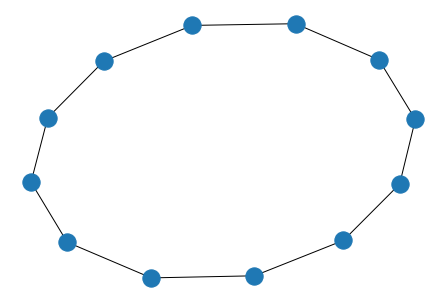

In [18]:
nx.draw(G)

In [19]:
plt.savefig("simple_path.png")

<Figure size 432x288 with 0 Axes>